In [ ]:
!pip install geotile

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from geotile import GeoTile

gt = GeoTile('/content/drive/MyDrive/dl/s2_imagery/Hetauda_S2_2020_12.tif')
gt.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': nan,
 'width': 6038,
 'height': 4103,
 'count': 6,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(8.983152841195215e-05, 0.0, 84.68328351866317,
        0.0, -8.983152841195215e-05, 27.653108885636467)}

In [19]:
gt.generate_tiles(save_tiles=False)
gt.convert_nan_to_zero()
gt.drop_nan_tiles()
gt.drop_zero_value_tiles()
gt.save_tiles('/content/tiles')

In [54]:
import glob

tiles = glob.glob("/content/tiles/*.tif")
len(tiles)

1048

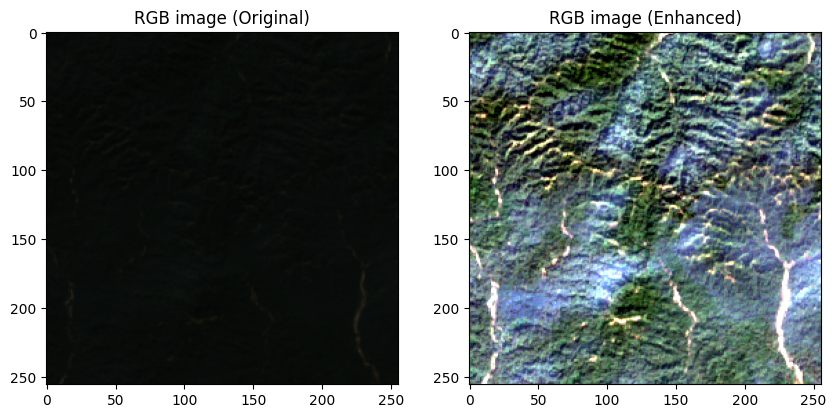

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
import rasterio as rio

# get the random image
img = np.random.randint(len(tiles))
# print(img)

# # open image with rio
src = rio.open(tiles[img])
# print(src.meta)

data = src.read()
# print(data.shape)

# # change the axis from (band, x, y) to (x,y, band)
data = np.transpose(data, (1, 2, 0))
# print(data.shape)

data_enhanced = np.zeros((256,256,6))
for i in range(data.shape[-1]):
    p2, p98 = np.percentile(data[:, :, i], (2, 98))
    data_enhanced[:, :, i] = exposure.rescale_intensity(data[:, :, i], in_range=(p2, p98))

# Plot imagery
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(10,5))
ax1.set_title("RGB image (Original)")
ax2.set_title("RGB image (Enhanced)")
ax1.imshow(data[:, :, 0:3])
ax2.imshow(data_enhanced[:, :, 0:3])
plt.show()